In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df = pd.read_csv('data/cities_by_hours.csv')

In [25]:
df.head()

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,C6H6,C7H8,C8H10,AQI,AQI_Bucket
0,Ahmedabad,1/1/2015 1:00,NaN,NaN,1.00,40.01,36.37,NaN,1.00,122.07,NaN,0.0,0.0,0.0,NaN,NaN
1,Ahmedabad,1/1/2015 2:00,NaN,NaN,0.02,27.75,19.73,NaN,0.02,85.90,NaN,0.0,0.0,0.0,NaN,NaN
2,Ahmedabad,1/1/2015 3:00,NaN,NaN,0.08,19.32,11.08,NaN,0.08,52.83,NaN,0.0,0.0,0.0,NaN,NaN
3,Ahmedabad,1/1/2015 4:00,NaN,NaN,0.30,16.45,9.20,NaN,0.30,39.53,153.58,0.0,0.0,0.0,NaN,NaN
4,Ahmedabad,1/1/2015 5:00,NaN,NaN,0.12,14.90,7.85,NaN,0.12,32.63,NaN,0.0,0.0,0.0,NaN,NaN


In [26]:
df.shape

(707875, 16)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707875 entries, 0 to 707874
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   City        707875 non-null  object 
 1   Datetime    707875 non-null  object 
 2   PM2.5       562787 non-null  float64
 3   PM10        411138 non-null  float64
 4   NO          591243 non-null  float64
 5   NO2         590753 non-null  float64
 6   NOx         584651 non-null  float64
 7   NH3         435333 non-null  float64
 8   CO          621358 non-null  float64
 9   SO2         577502 non-null  float64
 10  O3          578667 non-null  float64
 11  C6H6        544229 non-null  float64
 12  C7H8        487268 non-null  float64
 13  C8H10       252046 non-null  float64
 14  AQI         578795 non-null  float64
 15  AQI_Bucket  578795 non-null  object 
dtypes: float64(13), object(3)
memory usage: 86.4+ MB


In [28]:
df.isna().sum()

City               0
Datetime           0
PM2.5         145088
PM10          296737
NO            116632
NO2           117122
NOx           123224
NH3           272542
CO             86517
SO2           130373
O3            129208
C6H6          163646
C7H8          220607
C8H10         455829
AQI           129080
AQI_Bucket    129080
dtype: int64

<AxesSubplot:>

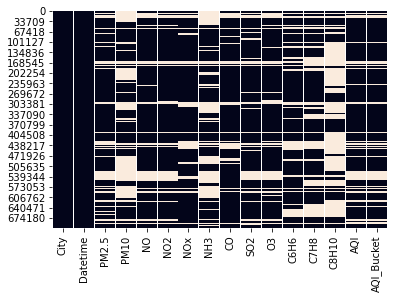

In [29]:
sns.heatmap(df.isnull(), cbar=None)

In [ ]:
df.Datetime = pd.to_datetime(df.Datetime)

In [ ]:
df.set_index('Datetime', inplace=True)

In [ ]:
plt.style.use('fivethirtyeight')
for column in df.columns[2:-2]:
    plt.figure(figsize=(20,8))
    df[column].plot(label=column)
    plt.legend()
plt.show()

In [ ]:
def remove_outliers(column):
    q1, q3 = np.percentile(df[column], [25,75])
    iqr = q3 - q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    df[column] = df[column].apply(lambda x:lower if x<lower else upper if x>upper else x)

In [ ]:
num_cols = df.select_dtypes(include='float64').columns
pollutants = num_cols[:-1]

In [ ]:
for column in  pollutants:
    remove_outliers(column)

In [ ]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values = np.nan, strategy = 'mean')

def imputer(df, col):
    df[col] = imp.fit_transform(df[[col]])

for col in pollutants:
    imputer(df, col)

In [ ]:
df.isnull().sum()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

df = MinMaxScaler().fit_transform(df.iloc[:,2:-2])
df1 = pd.DataFrame(df, columns=pollutants)

In [ ]:
df1.hist(alpha=0.5, figsize=(20, 10))
plt.show()

In [ ]:
df1['AQI'] = df['AQI']
df1.dropna(subset=['AQI'], inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df1.drop('AQI', axis=1)
y = df1['AQI']

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df2 = pd.DataFrame(scaler.fit_transform(X),
                  columns=X.columns)
df2.head()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X.isnull().sum()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

from sklearn.ensemble import GradientBoostingRegressor
model=GradientBoostingRegressor()
model.fit(X_train,y_train)

y1_pred = model.predict(X_test)
r2_score(y_test, y1_pred)